In [1]:
using Plots
using Flux


In [2]:
h(x, w) = w[1] * tanh(w[2] * x)
w₀ = [1, 1]
f(x) = h(x, w₀)

n = 1000
x = 2 .* rand(n) .- 1  # Uniform(-1, 1)
noise = randn(n) * 0.01     # N(0, 1)
y = f.(x) .+ noise


W = rand(2)
params = Flux.params(W)
predict(x) = h(x, W)
function loss(x, y)
    ŷ = predict.(x)
    sum((y .- ŷ) .^2) / n
end

loss(x, y)

0.04436805843371935

In [3]:
rec = W
rec_loss = []

Any[]

In [4]:
gs = gradient(Flux.params(W)) do
    loss(x, y)
end


for epoch in 1:1000
    dw = gs[W]
    W .-= 0.1 .* dw
    rec = cat(rec, W, dims=2)
    append!(rec_loss, loss(x, y))
end
@show W
loss(x, y)

W = [16.685463314445034, 14.03011911139049]


243.37067538333827

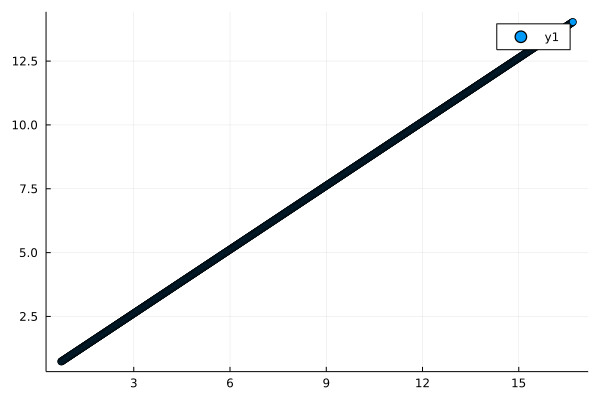

In [5]:
scatter(rec[1, :], rec[2, :])

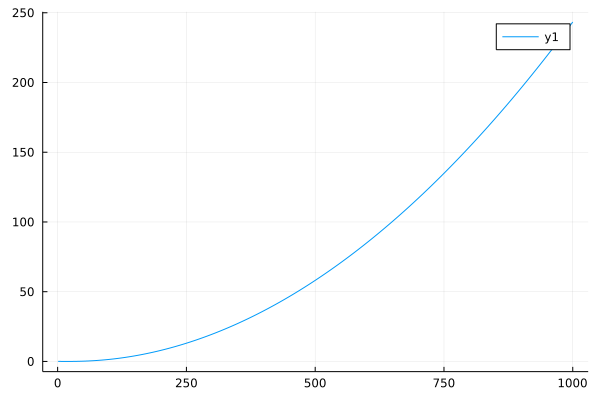

In [6]:
plot(rec_loss)

# Learning Flux

In [134]:
f(x) = 3x^2 + 2x + 1;
df(x) = gradient(f, x)[1];
d2f(x) = gradient(df, x)[1];

df(2), d2f(2)

(14.0, 6.0)

In [135]:
f(x, y) = sum((x .- y).^2);
gradient(f, [2, 1], [2, 0])

([0.0, 2.0], [-0.0, -2.0])

In [136]:
x = [2, 1];
y = [2, 0];
gs = gradient(Flux.params(x, y)) do 
    f(x, y)
end

gs[x], gs[y]

([0.0, 2.0], [-0.0, -2.0])

In [241]:
w = rand(2);
predict(x) = w[1] * tanh(w[2] * x)

function loss(x, y)
    ŷ = predict.(x)
    sum((y .- ŷ) .^2)
end

x, y = rand(1), rand(1)  
loss(x, y)

0.7114674373459058

In [312]:
gs = gradient(Flux.params(w)) do
    loss(x, y)
end

dw = gs[w]
w .-= 0.1 .* dw

loss(x, y)

4.552961146244317e-5